# <u>SMS-SPAM COLLECTION</u> --> 

#### Data Set Information :

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis.
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages.

#### Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.

#### Relevant Papers:

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.



### Steps we are going to perform :

* Step - 1 - Getting things ready for the project
> * Import the required libraries
> * Load the data

* Step - 2 - Perform the Exploratory Data Analysis on the data set

* Step - 3 - Preprocess the data
> * Remove special characters
> * Conversion to lowercase
> * Tokenization
> * Stemming or Lemmatization

* Step - 4 - Data Preparation
> * Train Test Split
> * Identify the target variable
> * Use Bag of Words to convert the Text data to Numerical Vectors

* Step - 5 - Train the Model. Use the following algorithms:
> * Logistic Regression
> * Decision Trees
> * SVM

* Step - 6 - Evaluation. For each Model, evaluate using following metrics:
> * Check accuracy score
> * Build confusion metric
> * Print Classification_report


### Object :
* Given :
> the message in tet form will be given.
* Predict that :
> Either this message is Spam or not.(Using <b>NLP i.e. Natural Language Processing</b>)

![](spam-filter.png)

## <U>STEP-1</U> : Getting things ready for the project

#### 1.1  Importing requires Libraries -

In [207]:
import warnings
warnings.filterwarnings('ignore')

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 1.2  Load The Data -

In [209]:
spam_df=pd.read_csv("SMSSpamCollection",sep='\t',names=['target','message'])
spam_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## <U>STEP-2</U> : Exploratory Data Analysis

In [210]:
print("the number of rows :",spam_df.shape[0])
print("the number of columns :",spam_df.shape[1])

the number of rows : 5572
the number of columns : 2


In [211]:
spam_df.describe(include='all')

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [212]:
spam_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

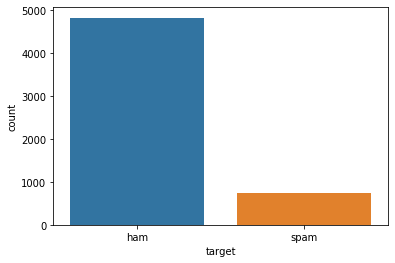

In [213]:
sns.countplot(x='target', data=spam_df)

<b>OBSERVATION :</b> We can see that there are very less spam messages in the data set as compared to Ham messges.

In [214]:
# For "SPAM" messages ->

df = spam_df.loc[spam_df['target']=='spam', :]
df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [215]:
df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [216]:
# Concatenating all the messages :

words = ' '.join(df['message'])

print(words)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [217]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word!=STOPWORDS
                            ])

<b>OBSERVATION :</b> Here we are cleaning the "spam" messages by removing the hyperlinks and stopwords.

In [218]:
# Word Cloud :

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

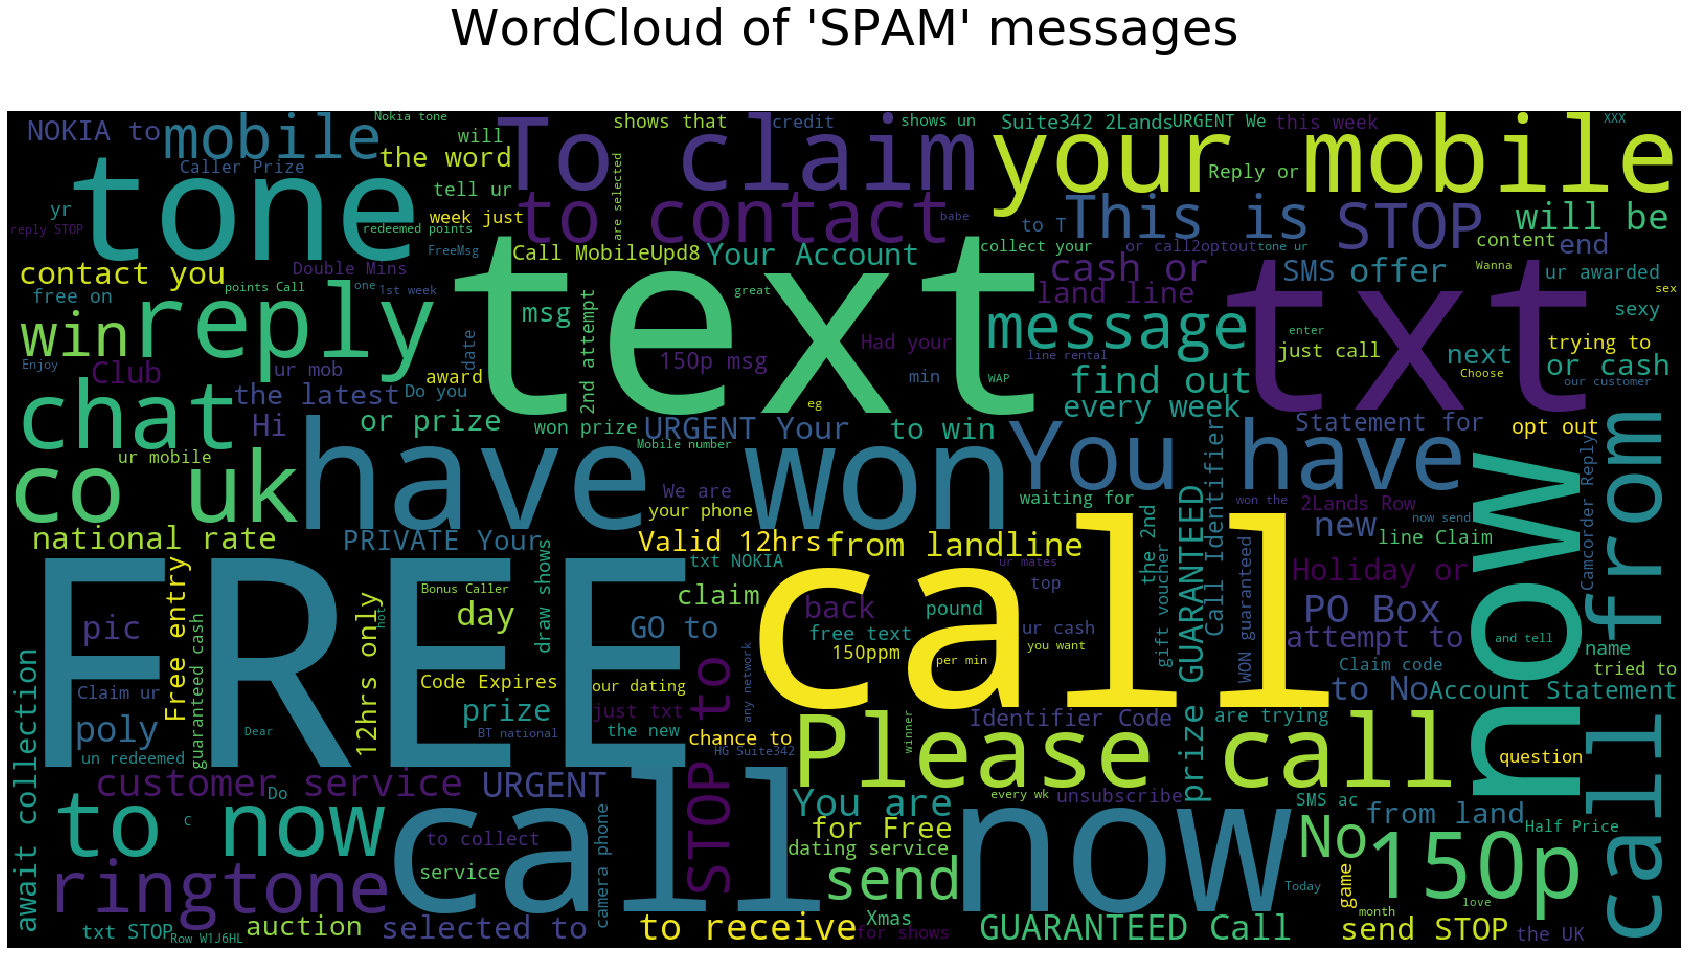

In [219]:
plt.figure(1,figsize=(30,20))
plt.title("WordCloud of 'SPAM' messages\n",fontsize=50)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [220]:
# For "HAM" messages ->

ham_df = spam_df.loc[spam_df['target']=='ham', :]
ham_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [221]:
ham_df['target'].value_counts()

ham    4825
Name: target, dtype: int64

In [222]:
# Concatenating all the messages:

ham_words = ' '.join(ham_df['message'])

print(ham_words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [223]:
cleaned_ham_word = " ".join([word for word in ham_words.split()
                            if 'http' not in word
                                and word!=STOPWORDS
                            ])

<b>OBSERVATION :</b> Here we are cleaning the "ham" messages by removing the hyperlinks and stopwords.

In [224]:
# Word Cloud :

wordcloud_ham = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_ham_word)

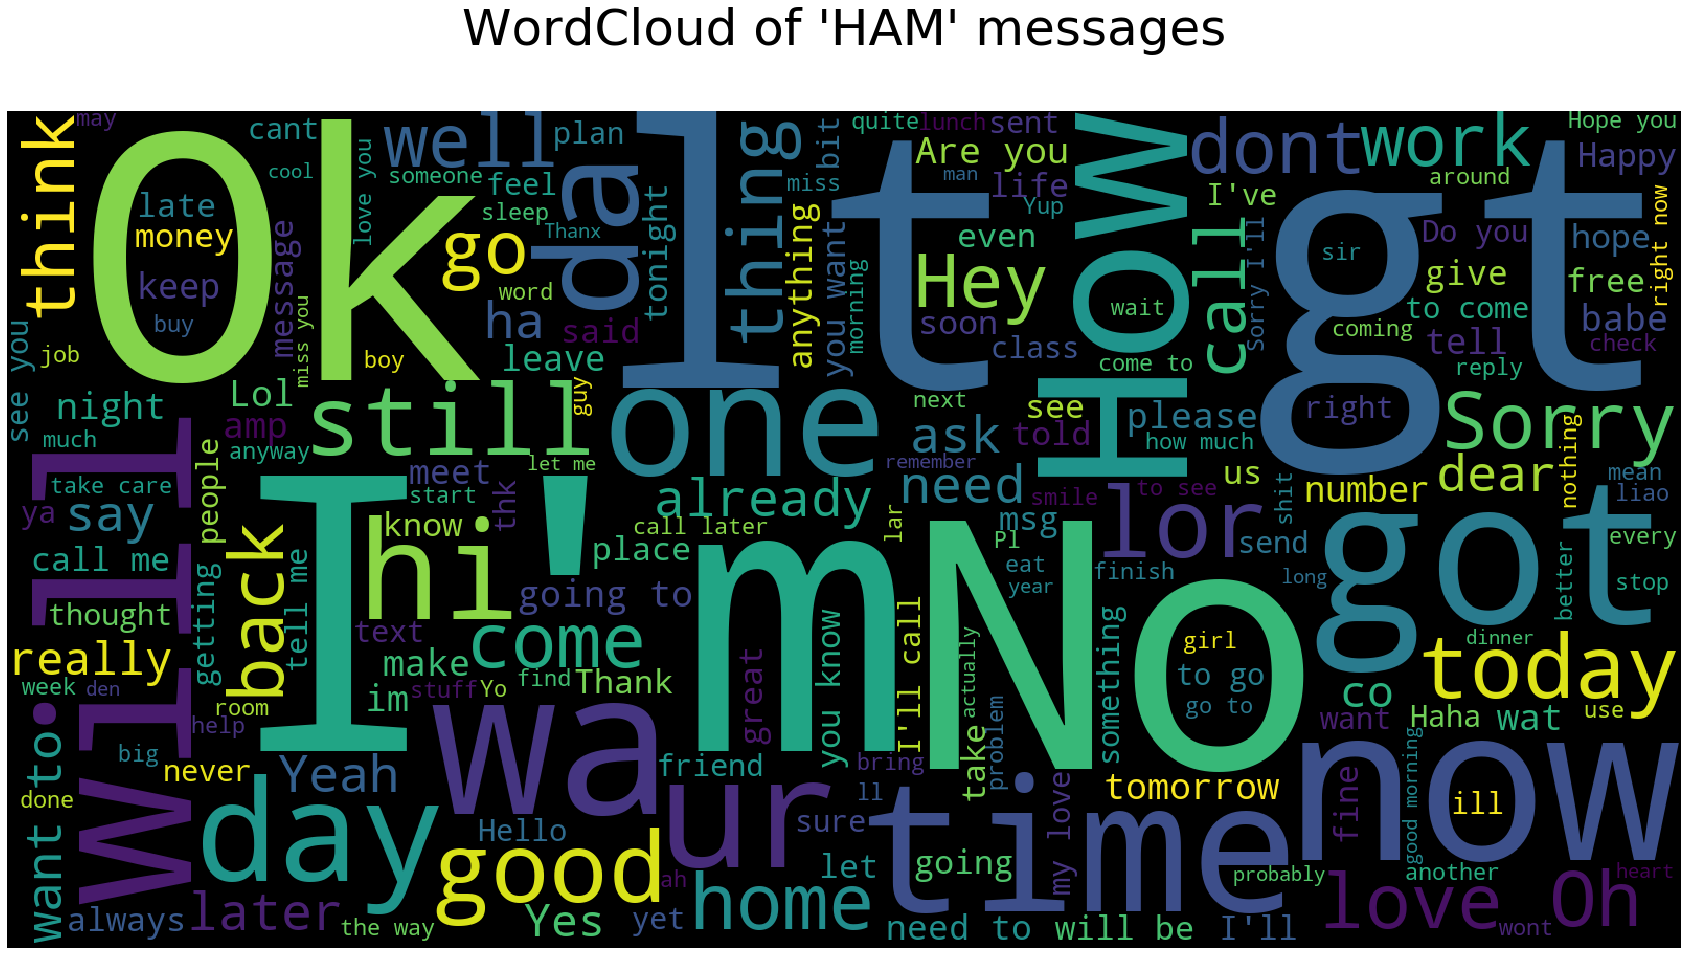

In [225]:
plt.figure(1,figsize=(30,20))
plt.title("WordCloud of 'HAM' messages\n",fontsize=50)
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.show()


## <U>STEP-3</U> : Data Preprocessing 

In [226]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [227]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [228]:
# initializse the inbuilt Lemmatizer 

lemmatizer = WordNetLemmatizer()

In [229]:
# initializing the lists

clean_spam_lst = []

spam_len_lst = []

#### 3.1 Removing special characters -
#### 3.2 Conversion to lower case -
#### 3.3 Tokenization -

In [230]:
def preprocess(raw_spam, flag):
    # Removing special characters and digits :
    letters_only = re.sub("[^a-zA-Z]", " ",raw_spam)
    
    # change sentence to lower case :
    letters_only = letters_only.lower()

    # tokenize into words :
    words = letters_only.split()
    
    # remove stop words :               
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_spam_lst.append(" ".join(words))
    
    spam_len_lst.append(len(words))

#### 3.4 Stemming & Lemmatization -

In [231]:
# Stemmatize the data :

clean_spam_lst = []

spam_len_lst = []

spam_df['message'].apply(lambda x: preprocess(x, 'stem'))

# adding 2 columns in Dataframe :

spam_df['clean_spam_stem'] = clean_spam_lst

spam_df['spam_length_stem'] = spam_len_lst

In [232]:
# Lemmatize the data :

clean_spam_lst = []

spam_len_lst = []

spam_df['message'].apply(lambda x: preprocess(x, 'lemma'))

# adding 2 columns in Dataframe :

spam_df['clean_spam_lema'] = clean_spam_lst

spam_df['spam_length_lema'] = spam_len_lst

In [233]:
spam_df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [234]:
spam_df['type']=spam_df['target'].apply(lambda x: 0 if x=='spam' else 1)
spam_df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema,type
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,1


<b>OBSERVATION :</b> The new type column get added in the Dataframe which contains the numerical value of target variable as:
* 1 denotes "ham" messages.
* 0 denotes "spam" messages.

## <U>STEP-4</U> : Data Preparation

#### 4.1  Train-Test split -

In [235]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(spam_df,test_size=0.2,random_state=42) # train-test ratio is 80-20 %

In [236]:
# Taking the stematized data for further predictions :

train_clean_spam=[]

for msg in train['clean_spam_stem']:
    train_clean_spam.append(msg)

test_clean_spam=[]

for msg in test['clean_spam_stem']:
    test_clean_spam.append(msg)

#### 4.2 Identify Target variable -

In [237]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing of Train and Test data :

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_spam)

test_features = vectorizer.transform(test_clean_spam)

#### 4.3  Bag Of Words (BOW) -

In [238]:
# Using BOW for converting text-data -> Numerical-data

vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [239]:
print("Total unique words in all messages:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words in all messages: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


## <U>STEP-5</U> : Train the Model

In [240]:
# importing required libraries :

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [241]:
# making a list of all the ML algo we will perform over the dataset :

Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

## <U>STEP-6</U> : Evaluation

########################################LogisticRegression########################################

-> Accuracy of LogisticRegression is 98.39%

-> CONFUSION METRIC :
[[965   1]
 [ 17 132]]

-> HEAT MAP :


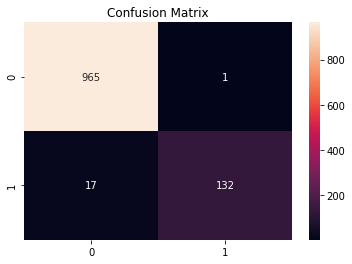


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

########################################DecisionTreeClassifier########################################

-> Accuracy of DecisionTreeClassifier is 97.49%

-> CONFUSION METRIC :
[[958   8]
 [ 20 129]]

-> HEAT MAP :


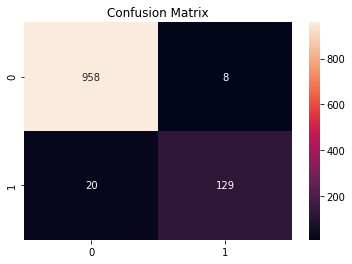


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.94      0.87      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

########################################SVC########################################

-> Accuracy of SVC is 98.39%

-> CONFUSION METRIC :
[[966   0]
 [ 18 131]]

-> HEAT MAP :


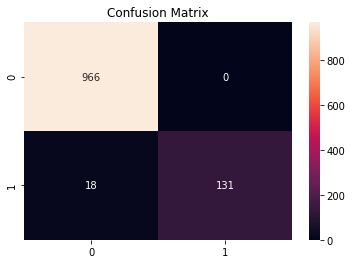


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [242]:
# Making dense feature i.e. converting the spaarse metric into the dense features 

dense_features = train_features.toarray() # for train data

dense_test = test_features.toarray() # for test data


# iteratoin over all the machine learning algorithms which are present in "Classifier" :
for cls_ in Classifiers:
    
    fit = cls_.fit(dense_features,train['target'])
    
    # make predictions :
    
    pred = fit.predict(dense_test) 
    
    # calculating the accuray :
    
    accuracy = round((accuracy_score(pred,test['target'])*100),2) 
    
    print('#'*40+cls_.__class__.__name__+ '#'*40)
    
    print('\n-> Accuracy of '+cls_.__class__.__name__+' is '+str(accuracy)+'%')
    
    # confusion metric :
    
    print("\n-> CONFUSION METRIC :")
    
    con_metric = confusion_matrix(test['target'], pred)
    
    print(con_metric) 
    
    # heat map for particular confusion metric :
    
    print("\n-> HEAT MAP :")
    
    sns.heatmap(con_metric, annot=True, fmt='d')
    
    plt.title("Confusion Matrix")
    
    plt.show()
    
    # Classification report :
    
    print("\n-> CLASSIFICATION REPORT :")
    
    print(classification_report(test['target'],pred))